In [1]:
# keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',
#                     padding='same', strides=1)

Conv2D 클래스의 첫 번째 매개변수는 필터의 개수 

kernal_size는 필터에 사용할 커널의 크기, 보틍 (3,3), (5,5)

padding 매개변수로 기본값은 valid, 셰임페딩을 사용하려면 same으로 설정하면 된다

strides? 필터가 이동하는 칸의 개수로 기본적으로 스트라이드는 1으로 한 칸씩 이동

chapter -08-2 

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target), (test_input, test_target)= keras.datasets.fashion_mnist.load_data()
train_scaled= train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


(48000, 28, 28) 크기인 train_input이 (48000,28, 28, 1) 크기인 train_scaled가 되었음 

3차원 배열 -> 4차원 배열 

In [3]:
### 합성곱 신경망 만들기 

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                              padding='same', input_shape=(28,28,1)))

Sequential 클래스의 객체를 만들고 첫 번째 합성곱 층인 Conv2D를 추가, 

이 클래스는 다른 층 클래스와 마찬가지로 keras.layers 패키지 아래에 있음 

add()메서드를 사용해 층을 하나씩 차례대로 추가 

합성곱층은 32개의 필터를 사용한다, 
커널의 크기는 (3,3)이고 렐루 활성화함수와 세임 패딩을 사용 

In [4]:
model.add(keras.layers.MaxPooling2D(2))

패션 MNIST 이미지가 (28, 28) 크기에 세임패딩을 적용했기 때문에 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 입력과 동일 

(2,2)풀링을 적용하였음으로 특성 맵의 크기는
절반으로 줄어든다


In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

합성곱- 풀링 층 다음에 두 번째 합성곱- 풀링 층을 추가하고 두 번째 합성곱-풀링 층은 첫 번째와 거의 동일, 필터의 개수는 64개로 늘린 점만 다르다 

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

은닉층과 출력층 사이에 드롭아웃을 넣음, 
드롭아웃 층이 은닉층의 과대적합을 막아 성능을 조금 개선해줌 

은닉층은 100개의 뉴언을 사용하고 활성화 함수는 합성곱과 마찬가지로 렐루 함수를 사용 

패션MNIST 데이터셋은 클래스 10개를 분류하는 다중 분류문제이기 때문에 활성화 함수는 softmax 사용함 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

첫 번째 합성곱 층을 통과하면서 특성 맵의 깊이는 32가 되고 두 번째 합성곱에서 특성 맵의 크기가 64로 늘어납니다. 

특성 맵의 가로세로 크기는 첫 번째 풀링 층에서 절반으로 줄어들고 두 번째 풀링층에서 다시 절받으로 더 줄어듬 

최종 특성 맵의 크기(7,7,64)임 

완전 연결 신경망에서 했던 것처럼 모델 파라미터의 개수를 계산, 
첫 번째 합성곱 층은 32개의 필터를 가지고 있고 크기가 (3,3), 깊이가 1이다 
필터마다 절편이 있음 

총 3 x 3 x 1 x 32 + 32 = 320개의 파라미터가 있음   

두 번째 합성곱 층은 64개의 필터를 사용하고 크기가 (3,3), 깊이가 32임 
역시 필터마다 하나의 절편이 있음 

총 3 x 3 x 32 x 64 +64 = 18,496개의 파라미터가 있음 

Flatten 클래스에서 (7,7,64) 크기의 특성 맵을 1차원 배열로 펼치면 (3136,) 크기의 배열이 됨
이를 100개의 뉴런과 완전히 연결해야 하므로 은닉층의 모델 파라미터 개수는 3,136 x 100 + 100 = 313.700개, 마찬가지 방식으로 계산하면 마지막 출력층의 모델 파라미터 개수는 1,010개

### 층의 구성을 그림으로 표현해 주는 plot_model()함수를 keras.utils패키지에서 제공 , 이 함수에 앞에서 만든 model 객체를 넣어 호출 

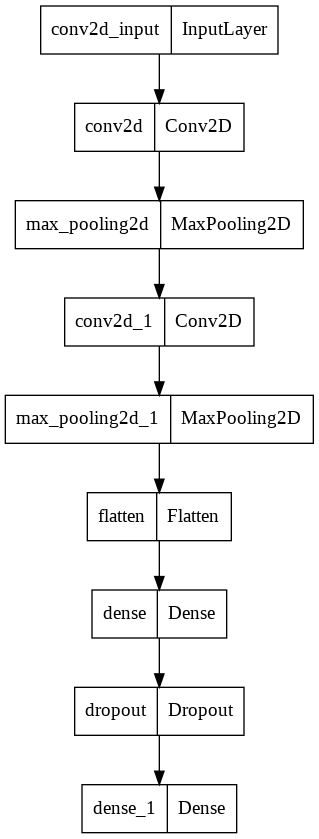

In [8]:
keras.utils.plot_model(model)

plot_model() 함수의 show_shapes 매개변수를 True로 설정, 이 그림에 입력과 출력의 크기를 표시 

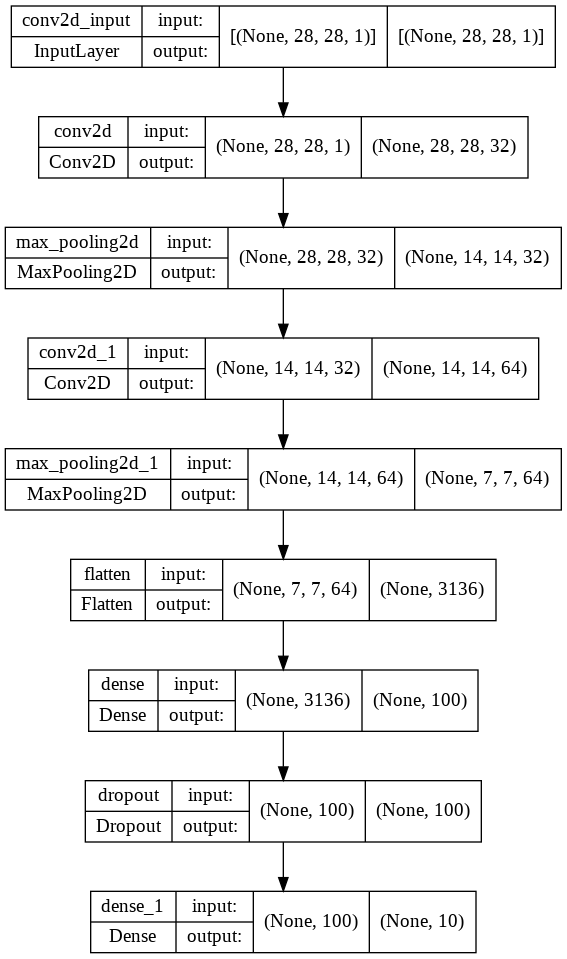

In [9]:
keras.utils.plot_model(model, show_shapes=True)

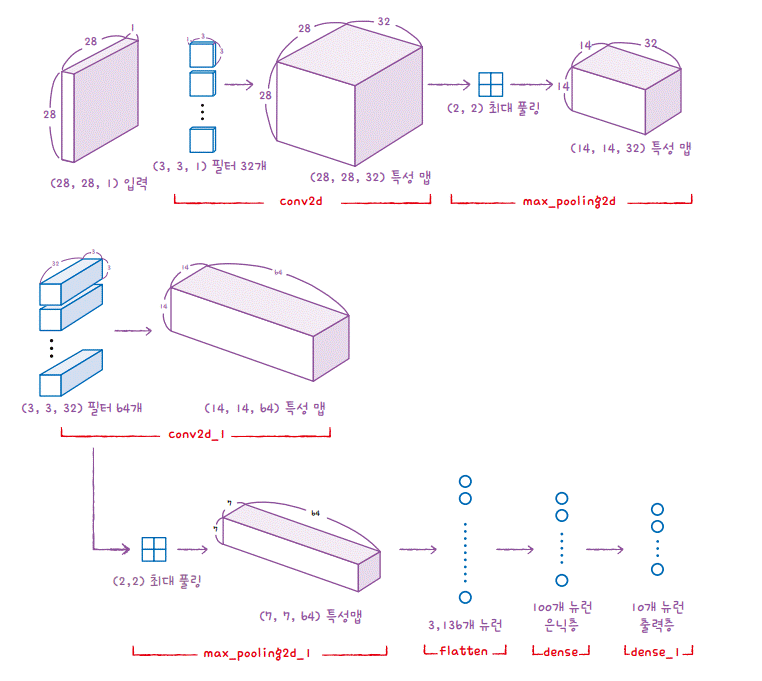

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                               save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 18s 4ms/step - loss: 0.5165 - accuracy: 0.8147 - val_loss: 0.3468 - val_accuracy: 0.8681
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3467 - accuracy: 0.8753 - val_loss: 0.2853 - val_accuracy: 0.8947
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2966 - accuracy: 0.8922 - val_loss: 0.2548 - val_accuracy: 0.9068
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2608 - accuracy: 0.9055 - val_loss: 0.2389 - val_accuracy: 0.9119
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2366 - accuracy: 0.9124 - val_loss: 0.2246 - val_accuracy: 0.9161
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2174 - accuracy: 0.9196 - val_loss: 0.2271 - val_accuracy: 0.9193
Epoch 7/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1999 - accuracy: 0.9268 - val_loss: 0.2250 - val_accurac

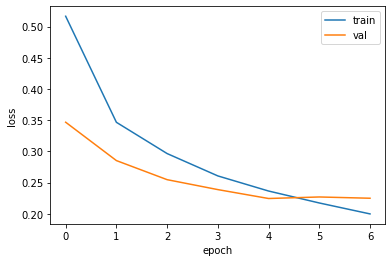

In [11]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증 세트에 대한 손실이 점차 감소하다가 정체되기 시작하고 훈련 세트에 대한 손실은 점점 더 낮아지고 있습니다. 이 그래프는 기반으로 아홉 번째 에포크를 최적으로 생각 

세트에 대한 성능을 평가해보기

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2246 - accuracy: 0.9161


[0.22459657490253448, 0.9160833358764648]

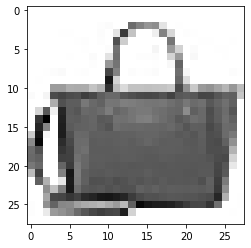

In [13]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

모델은 이 이미지에 대해 어떤 예측을 만드는지 확인 

predict() 메서드는 10개의 클래스에 대한 예측 확률을 출력함 

In [14]:
preds= model.predict(val_scaled[0:1])
print(preds)

[[6.5295064e-15 5.1125581e-20 2.6978251e-17 2.7267237e-16 6.4491500e-16
  1.5983164e-14 7.7986544e-15 2.1683496e-14 1.0000000e+00 5.4282353e-19]]


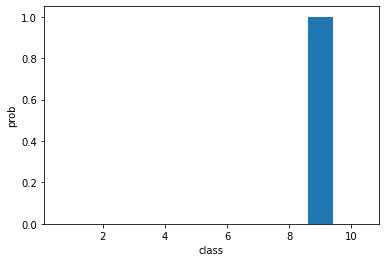

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

다른 클래스의 값은 사실상 0이다.

In [16]:
classes= ['티셔츠', '바지', '스웨터','드레스','코트','샌달','셔츠','스니커즈',
          '가방', '앵클 부츠']

preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled= test_input.reshape(-1, 28, 28, 1)/ 255.0

In [19]:
# 테스트 세트에 대한 성능을 측정 
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2452 - accuracy: 0.9135


[0.2452200949192047, 0.9135000109672546]